<a href="https://colab.research.google.com/github/nefetorve/studia/blob/main/160954_DataScience_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt z kursu Data Science
**Wykonała:** Agnieszka Pilch

### **1.   Dane**
Dane pochodzą ze strony: https://www.kaggle.com/blastchar/telco-customer-churn. 









**1.1. Omówienie problemu badawczego**

Problem badawczy dotyczy przewidywania zachowania klientów. Na podstawie zebranych danych, należy sprawdzić które czynniki sprawiają, że klienci rezygnują z usług danej firmy.


**1.2. Załadowanie danych**

In [ ]:
%matplotlib inline 
import pandas as pd

df_raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.head() #wyświetlenie danych 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
unikalne_wartosci = {}
for col in df_raw:
    x = df_raw[col].value_counts()
    unikalne_wartosci[x.name]={}
    for index, value in x.items():
      unikalne_wartosci[x.name][index]= value


In [ ]:
unikalne_wartosci["OnlineBackup"]

{'No': 3088, 'No internet service': 1526, 'Yes': 2429}

**1.3. Opis nazw kolumn** 

|Indeks|	Nazwa atrybutu	|Opis
--- | --- | ---
|1.|	customerID|	ID klienta w formacie 0000-XXXXX
|2.|	gender|	płeć - Female / Male
|3.|	SeniorCitizen|	osoba starsza - 0 / 1
|4.|	Partner|	partner – Yes / No
|5.|	Dependents|	czy klient ma osoby na utrzymaniu – Yes / No
|6.|	tenure|	liczba miesięcy w firmie
|7.|	PhoneService|	usługa telefoinczna – Yes / No
|8.|	MultipleLines|	wiele linii – Yes / No 
|9.|	InternetService|	rodzaj Internetu - DSL / Fiber optic / No
|10.|	OnlineSecurity|	zabezpieczenia online – Yes / No
|11.|	OnlineBackup|	kopia zapasowa – Yes / No
|12.|	DeviceProtection|	ochrona urządzenia - Yes / No
|13.|	TechSupport|	obsługa klienta – Yes / No
|14.|	StreamingTV|	czy jest usługa strimingu TV – Yes / No 
|15.|	StreamingMovies|	czy jest usługa strimingu filmów - Yes / No
|16.|	Contract|	jaki abonament – One year / Two year / Month-to-month
|17.|	PaperlessBilling|	faktura elektroniczna – Yes / No
|18.|	PaymentMethod|	metoda płatności - Electronic / Mailed / Bank transfer / Credit card
|19.|	MonthlyCharges|	opłata miesięczna
|20.|	TotalCharges|	suma opłat
|21.|	Churn|	czy klient odszedł w ostatnim miesiącu – Yes / No


Podane odpowiedzi są uproszczone, ponieważ w przypadku kategorii np. *OnlineBackup*, pojawia się odpowiedź: "No internet service". 

**1.4. Sprawdzenie typów danych dataframe**

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**1.5. Podstawowe statystyki**

In [ ]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**2. Czyszczenie danych**


Sprawdzenie, czy istnieją wartości null. W przypadku, gdyby wystąpiły w zbiorze użyta zostałaby funkcja: *dropna()*.

In [ ]:
df_raw.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Usunięto kolumnę customerID, ponieważ jest to unikalny identyfikator klienta - nie zostanie on użyty w żadnej analizie.

In [ ]:
df_copy = df_raw.drop(columns=["customerID"])

Zauważono, że kolumna *TotalCharges* nie jest uwzględniona podczas użycia funkcji describe(). Przyczyną jest format danych, który należy zmienić. Podczas użycia funkcji pd.to_numeric(df_copy.TotalCharges) zauważono, że kolumna zawiera puste pola w formacie stringa.

In [ ]:
df_copy["TotalCharges"] = pd.to_numeric(df_copy.TotalCharges, errors='coerce')

Ponownne sprawdzenie wartości "null" w kolumnach. TotalCharges zawiera 11 takich wartości.

In [ ]:
df_copy.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Usunięcie wierszy z brakującymi wierszami. Co moglibyśmy jeszcze zrobić w tym przypadku? 


1.   Przewidywanie brakujących wartości
2.   Brakujące wartości nadpisane średnią/medianą
3.   Dla zmiennych kategorialnych: nadpisanie pustych elementów najczęściej     występującą kategorią lub utworzenie nowej



In [ ]:
df_copy = df_copy.dropna()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Przekształcenie etykiet tekstowych na liczbowe**


W zestawie danych jest dużo danych kategorialnych, które ciężko jest analizować. W tym punkcie zostaną przekształcone etykiety tekstowe na liczby. Nie warto zamieniać zmiennych bezpośrednio na liczby, czyli np. dla kategorii *MyltipleLines* nadawać: 

*   0 - No 
*   1 - No phone service
*   2 - yes,

ponieważ algorytmy uczenia maszynowego mogą uznawać, że dwie zbliżone wartości będą bardziej podobne do siebie niż do dalszych wartości. Wykorzystam w tym przypadku tzw. **kodowanie "gorącojedynkowe** (ang. one-hot encoding), ponieważ tylko jeden atrybut będzie tzw. "gorący" (wartość 1), podczas, gdy inne będą zimne (wartość 0). Na podstawie książki Géron'a (2018). *Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow* zaczęłam od wykorzystania LabelBinarizer, jednak po przejrzeniu innych możliwości związanych z powyższą tematyką (w Internecie), wykorzystałam Pandasa, dokładniej funkcję get_dummies(), która pozwoliła mi na przekonwertowanie moich zmiennych kategorialnych. 


In [ ]:
konwert_wartosci_na_zerojeden = ["gender","Partner","Dependents","PaperlessBilling","PhoneService","Churn"]
lista_kategorii_onehotenc = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_copy_cat = df_copy.copy()
df_copy_cat = pd.get_dummies(df_copy_cat, columns=lista_kategorii_onehotenc)

def konwersja_wartosci(df, konwert_wartosci_na_zerojeden):
  for i in konwert_wartosci_na_zerojeden:
    df[i] = df[i].map({"Yes": 1, "No": 0,"Male":0,"Female":1})

konwersja_wartosci(df_copy_cat,konwert_wartosci_na_zerojeden)
df_copy_cat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


**3. Badanie korelacji**

Zbadanie korelacji pomiędzy Churn a resztą parametrów. Z tego względu, że wystąpiła korelacja ujemna użyto funkcji abs(), żeby wyznaczyć siłę związków korlacyjnych.

In [ ]:
import plotly.express as px
df_corr = abs(df_copy_cat.corr()["Churn"]).sort_values(ascending=False)
fig = px.bar(df_corr,x=df_corr.index,y=df_corr.values,color=df_corr.values,labels={"x": "Kategoria", "y": "Korelacja"})

fig.show()


# **Siła związków korelacyjnych**

*   poniżej 0,2 - korelacja słaba (praktycznie brak związku)
*   0,2 – 0,4 - korelacja niska (zależność wyraźna)
*   0,4 – 0,6 - korelacja umiarkowana
(zależność istotna)

*   0,6 – 0,8 - korelacja wysoka (zależność
znaczna)
*   0,8 – 0,9 - korelacja bardzo wysoka
(zależność bardzo duża)
*   0,9 – 1,0 - zależność praktycznie pełna













# Wykresy pudełkowe

In [ ]:
fig = px.box(df_copy,y="TotalCharges")
fig.show()

In [ ]:
fig = px.box(df_copy, y="tenure")
fig.show()

In [ ]:
fig = px.box(df_copy,x="Churn", y="MonthlyCharges")
fig.show()

Wykres pudełkowy podkreśla ujemną korelację między stażem a rezygnacją. 
Pozostałe wykresy pudełkowe nie pokazują żadnych wartości odstających w rozkładzie.

In [ ]:
column_values = df_copy.Churn.ravel()

In [ ]:
group_tenure_yes = df_copy[df_copy["Churn"] == "Yes"].groupby("tenure").count()
churn_group_yes = group_tenure_yes["Churn"]
group_tenure_no = df_copy[df_copy["Churn"] == "No"].groupby("tenure").count()
churn_group_no = group_tenure_no["Churn"]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Yes', x=churn_group_yes.index, y=churn_group_yes.values),
    go.Bar(name='No', x=churn_group_no.index, y=churn_group_no.values)
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

Powyższy wykres pokazuje, że wskaźnik odejścia klientów spada wraz ze wzrostem stażu, co jest dobrą wskazówką, że firma jest w stanie utrzymać stałych klientów. Wiązać się to może z typem przedłużenia umowy, która po pewnym okresie może być przedłużana automatycznie - firma dzięki temu utrzymuje klientów. Klient już przyzwyczajony do tej firmy po prostu woli zostać w niej niż szukać czegoś nowego.

# Dzielenie danych na testowe i treningowe

In [ ]:
 from sklearn.model_selection import train_test_split
 X1 = df_copy_cat.drop(df_corr[df_corr < 0.18].index,axis=1)

In [ ]:
X1 = X1.drop(["Churn"],axis=1)

In [ ]:
 X = X1.values

In [ ]:
 y = df_copy_cat["Churn"].values

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [ ]:
print("Rozmiar X_train: ", X_train.shape)
print("Rozmiar X_test.shape: ", X_test.shape)
print("Rozmiar y_train.shape: ", y_train.shape)
print("Rozmiar y_test.shape: ", y_test.shape)

Rozmiar X_train:  (3516, 19)
Rozmiar X_test.shape:  (3516, 19)
Rozmiar y_train.shape:  (3516,)
Rozmiar y_test.shape:  (3516,)


In [ ]:
X_Contract_Tenure = X1.loc[:, ['tenure','MonthlyCharges']].values

**KNN**


K-najbliższych sąsiadów to prosty algorytm, który przechowuje wszystkie dostępne przypadki i klasyfikuje nowe przypadki na podstawie miary podobieństwa (np. Funkcji odległości). KNN był używany w estymacji statystycznej i rozpoznawaniu wzorców już na początku lat 70. XX wieku jako technika nieparametryczna. 

Klasyfikacja polega na większości "głosów" sąsiadów, przy czym dane są przypisywane do klasy najczęściej występującej wśród K najbliższych sąsiadów, mierzonej funkcją odległości. Jeśli K = 1, to przypadek jest po prostu przypisywany do klasy najbliższego sąsiada. 

**Algorytmy, które mogą zostać wykorzystane**:


1.   Eukleidesowy:  $\sqrt{\sum_{i=1}^{k}\left(x_i-y_i\right)^2}$
2.   Manhattan: $\sqrt{\sum_{i=1}^{k}\left|x_i-yi\right|}$
3.   Minkowski: $\left(\sqrt{\sum_{i=1}^{k}\left({|x}_i-y_i|\right)^q}\right)^\frac{1}{q}$



Macierz błędu (ang. confusion matrix) jest podstawowym narzędziem stosowanym do oceny jakości klasyfikacji. Poniżej rozważymy przypadek klasyfikacji binarnej (dwie klasy).
Kodowanie klas:
1.   Positive (np.: fakt skorzystania z produktu przez Klienta, pacjent z potwierdzoną chorobą, pacjentka z potwierdzoną ciążą)
2.   Negative (np.: fakt nieskorzystania z produktu przez Klienta, pacjent z wykluczoną chorobą, pacjentka z wykluczoną ciążą)



**Możliwe wyniki klasyfikacji**


Macierz błędu powstaje z przecięcia klasy prognozowanej i klasy faktycznie zaobserwowanej, mamy zatem 4 przypadki (2 dla zgodności i 2 dla niezgodności prognozy ze stanem faktycznym).

*   True-Positive (TP – prawdziwie pozytywna): przewidywanie pozytywne, faktycznie zaobserwowana klasa pozytywna (np. pozytywny wynik testu ciążowego i ciąża potwierdzona)
*   True-Negative (TN – prawdziwie negatywna): przewidywanie negatywne, faktycznie zaobserwowana klasa negatywna (np. negatywny wynik testu ciążowego i brak ciąży)
*   False-Positive (FP – fałszywie pozytywna): przewidywanie pozytywne, faktycznie zaobserwowana klasa negatywna (np. pozytywny wynik testu ciążowego, jednak faktyczny brak ciąży)
*   False-Negative (FN – fałszywie negatywna): przewidywanie negatywne, faktycznie zaobserwowana klasa pozytywna (np. negatywny wynik testu ciążowego, jednak ciąża potwierdzona)

Źródło teoretyczne: [math.space](https://mathspace.pl/matematyka/confusion-matrix-macierz-bledu-tablica-pomylek-czyli-ocena-jakosci-klasyfikacji-czesc-1/)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_score = knn.predict_proba(X_test)


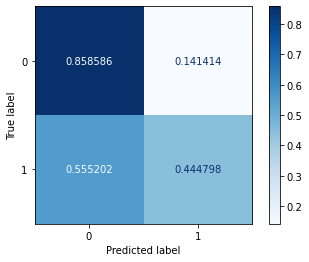

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 values_format="f",normalize="true")
disp 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Macierz pomyłek: \n",  confusion_matrix(y_test, y_pred))

Macierz pomyłek: 
 [[2210  364]
 [ 523  419]]


**Precyzja**

1. PPV - miara precyzji wskazująca z jaką pewnością możemy ufać przewidywaniom 
pozytywnym, tzn. w jakim procencie przewidywania pozytywne potwierdzają się stanem faktycznie pozytywnym (np. procent osób z pozytywnym wynikiem testu medycznego, u których następnie potwierdzono diagnozę). PPV można zapisać również jako $PPV\ =\ \frac{TP}{TP\ +FP\ }$
2. NPV - miara precyzji wskazująca z jaką pewnością możemy ufać przewidywaniom negatywnym, tzn. w jakim procencie przewidywania negatywne potwierdzają się stanem faktycznie negatywnym (np. procent osób z negatywnym wynikiem testu medycznego, u których następnie wykluczono chorobę). NPV można zapisać również jako $NPV\ =\ \frac{TN}{TN\ +FN\ }$

**Czułość (ang. sensitivity, recall)** - $RECALL\ =\ \frac{TP}{TP\ +FN\ }$

**f1-score** - średnia harmoniczna precyzji i pełności 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2574
           1       0.54      0.44      0.49       942

    accuracy                           0.75      3516
   macro avg       0.67      0.65      0.66      3516
weighted avg       0.74      0.75      0.74      3516



In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score[:, i].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

**Wykres krzywej charakterystyki roboczej odbiornika (ang. receiver operating characteristic — ROC**) stanowi kolejne popularne narzędzie używane wraz z klasyfikatorami binarnymi. Przypomina on w znacznym stopniu wykres precyzji w funkcji pełności, jednak w tym przypadku rysujemy odsetek prawdziwie pozytywnych (inna nazwa pełności; w skrócie OPP) w funkcji odsetka fałszywie pozytywnych (OFP) — jest to odsetek negatywnych przykładów, które zostały nieprawidłowo sklasyfikowane jako pozytywne. Otrzymujemy tę wartość, odejmując odsetek prawdziwie negatywnych (OPN) od liczby 1; jak można się domyślić, jest to odsetek negatywnych próbek, które zostały prawidłowo sklasyfikowane jako negatywne. Wartość ta bywa również nazywana specyficznością. Dlatego krzywa ROC składa się z czułości (czyli pełności) w funkcji 1 – specyficzność.

**Źródło:** Géron, A. (2018). *Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow.* Helion.

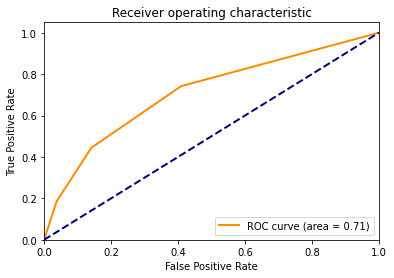

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN 2-dim

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X_Contract_Tenure, y, test_size=0.25, random_state=0)
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.62814876,  1.46066229],
       [ 1.46485552, -1.4956825 ],
       [-0.86207312,  0.81239954],
       ...,
       [ 0.73003595,  1.37067209],
       [-0.73960319,  0.52076462],
       [ 1.30156228,  1.32734347]])

# KNN - wykres


Minimum error:- 0.20705346985210465 at K = 32


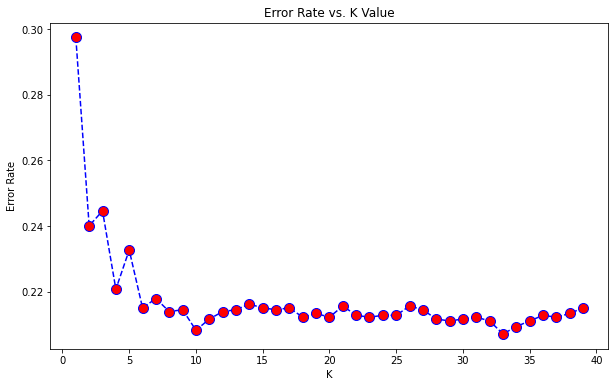

In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7929465301478953 at K = 32


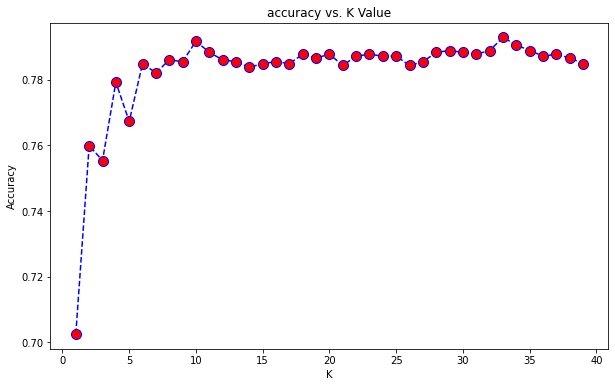

In [ ]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
k = acc.index(max(acc))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
classifier = KNeighborsClassifier(n_neighbors =k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cm

array([[1202,  109],
       [ 262,  185]])

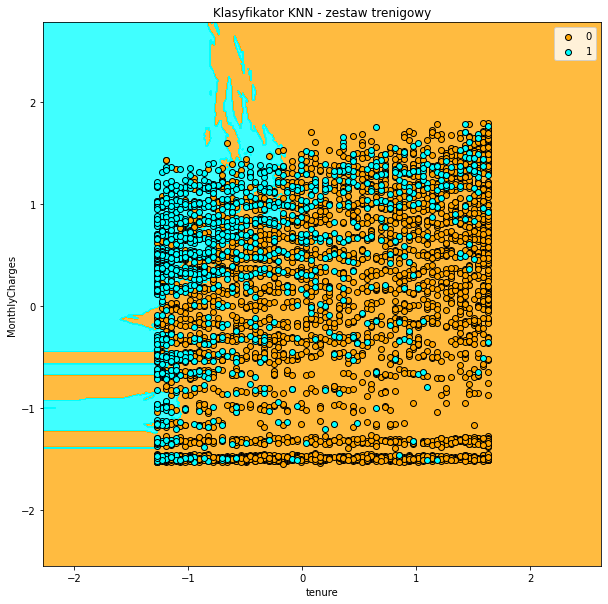

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(10,10))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'cyan')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('orange', 'cyan'))(i), label = j,edgecolor="black")
plt.title('Klasyfikator KNN - zestaw trenigowy')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
df_copy_cat['intercept'] = 1
lm = sm.OLS(df_copy_cat['TotalCharges'], df_copy_cat[['intercept', 'InternetService_DSL', 'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 
                                                'PaymentMethod_Electronic check']])
results = lm.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1491.
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:24:30   Log-Likelihood:                -61419.
No. Observations:                7032   AIC:                         1.229e+05
Df Residuals:                    7025   BIC:                         1.229e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
intercept                             -1192.1576     47.828    -24.926      0.000   -1285.915   -1098.400
InternetService_DSL                    2010.2777     50.407     39.881      0.000    1911.464    2109.091
InternetService_Fiber optic            3689.1829     51.785     71.240      0.000    3587.668    3790.697
Contract_One year                      2091.1574     47.408     44.110      0.000    1998.224    2184.091
Contract_Two year                      3172.7115     47.632     66.608      0.000    3079.338    3266.085
PaymentMethod_Credit card (automatic)   274.7369     47.699      5.760      0.000     181.233     368.241
PaymentMethod_Electronic check         -288.0330     45.228     -6.368      0.000    -376.694    -199.372
==============================================================================
Omnibus:                      177.765   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.132
Skew:                           0.373   Prob(JB):                     2.82e-40
Kurtosis:                       2.748   Cond. No.                         5.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params.sort_values()[3:]

InternetService_DSL            2010.277708
Contract_One year              2091.157400
Contract_Two year              3172.711477
InternetService_Fiber optic    3689.182939
dtype: float64

# Wnioski

Z korelacji wynika, że wskaźnik pozostania klienta zależy od: 
*   Contract_Month-to-month   
*   tenure                     
*   OnlineSecurity_No                
*   TechSupport_No                 
*   InternetService_Fiber optic        
*   Contract_Two year              
*   PaymentMethod_Electronic check       


Wskaźnik odejścia klientów spada wraz ze wzrostem stażu klienta, co jest dobrą wskazówką, że firma jest w stanie utrzymać stałych klientów. Wiązać się to może z typem przedłużenia umowy, która po pewnym okresie może być przedłużana automatycznie - firma dzięki temu utrzymuje klientów. Klient już przyzwyczajony do tej firmy po prostu woli zostać w niej niż szukać czegoś nowego.


Z klasyfikacji KNN można wywnioskować, że jeżeli klient jest długo w firmie i płaci małe rachunki - to zostanie w firmie, a w przeciwnym wypadku odejdzie. 

Z danych da się wyłuskać więcej, jednak zabrakło czasu do analizy ich oraz trudnością na początku okazało się, że większość danych to dane kategorialne. Skupiono się bardziej na praktycznej stronie wykorzystania danych (oraz uzupełnieniu merytorycznym) niż na kopiowaniu gotowych rozwiązań. Pozwoliło to na wykorzystanie takich źródeł jak: dokumentacja np. [Nearest Neighbors Classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html?fbclid=IwAR1PpljdLIS9-nqC1veIrOtg7_PPZ69A8q3rRjK0ng1bzKxX3RCwFWgWxJo#sphx-glr-auto-examples-neighbors-plot-classification-py), książka przywoływana wcześniej, czyli Géron (2018). Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow (wydawnictwo Helion) oraz [StackOverFlow](https://stackoverflow.com/). 

Ciekawym zagadnieniem jest użycie funkcji StandardScaler(), który standaryzuje funkcję, usuwając średnią i skaluje ją do wariancji jednostkowej. Więcej informacji jest na stronie: [DataScience.StackexChange](https://datascience.stackexchange.com/) oraz [sklearn.preprocessing](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)